In [ ]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt

# 1. Feedforward: Building a ReLU neural network

1) Draw a network
2) Write out the mathematical equation for the output of this network (feel free to break the input-output relationship into multiple equations).

Please find the picture from https://github.com/MiaoWang1009/ANLY590-Project/blob/master/hw2.png

3) Write out the forward-pass function in python, call it ff_nn_ReLu(...)

In [ ]:
def ReLu(z):
  return np.maximum(0,z)

def sigmoid(z):
  return 1/(1+np.exp(-np.array(z)))

def ff_nn_ReLu(X, W, b, V, c):
  H=ReLu(np.dot(np.array(X),np.array(W))+b)
  Y=sigmoid(np.dot(H,np.array(V))+c)
  return Y

4) Suppose you have the following set of weight matrices and a few inputs:

In [ ]:
X=[[1, -1],
   [0, -1],
   [0, 1]]

W=[[1, -1, 0, 1],
   [0, 0, 0.5, 1]]

V=[1, 0, -1, 1]

b=[0, 0, 1, 0]
c=[1]

Y=ff_nn_ReLu(X, W, b, V, c)

What are the class probabilities associated with the forward pass of each sample?

In [ ]:
print('the results of each sample are', Y)

the results of each sample are [0.81757448 0.62245933 0.62245933]


#2. Gradient Descent

$ f(x,y) = (3-x^3) + 50 * (2y^2-x)^2 $

1. What are the partial derivatives of f with respect to x and to y?

- $\frac{d(f)}{dx} = -3x^2 - 200y^2 +100x$

- $\frac{d(f)}{dy} = -400xy + 800y^3$

2. Create a visualization of the contours of this function.

In [ ]:
# delta = 0.025
# x = np.arange(-10.0, 70.0, delta)
# y = np.arange(-10.0, 10.0, delta)
# X, Y = np.meshgrid(x, y)
# Z = (3-X)**3 + (Y**2*2-x)**2*50
# fig, ax = plt.subplots()
# CS = ax.contour(X, Y, Z)

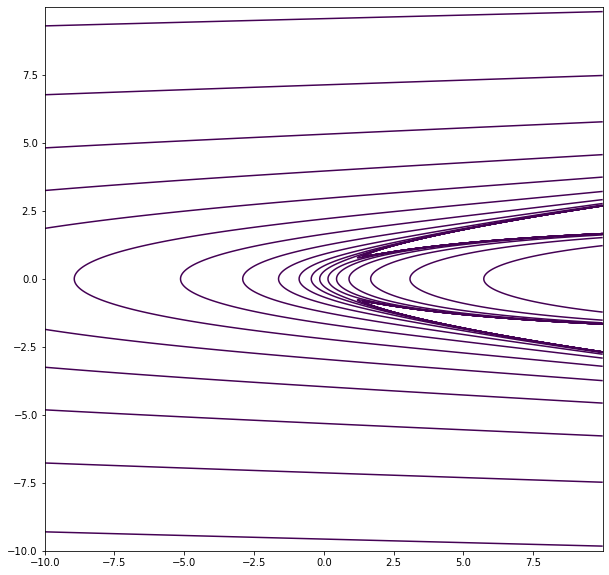

In [ ]:
x=np.arange(-10, 10, 0.01)
y=np.arange(-10, 10, 0.01)
X,Y=np.meshgrid(x,y)
F=3 - X**3 + 50 * (2 * Y**2 - X)**2

plt.figure(figsize=(10,10))
plt.contour(X, Y, F, np.logspace(-5,20,base=10))

3. Write a Gradient Descent algorithm for nding the minimum of the function. Visualize your results with a few dierent learning rates.

In [ ]:
def gradient(vector):
  x,y=vector
  df_dx = -3 * x**2 + 100 * x - 200 * y**2
  df_dy = 800 * y**3 - 400 * x * y
  return np.array([df_dx, df_dy])

def grad_descent(starting_point, iterations, learning_rate):
  point = starting_point
  trajectory = [point]
    
  for i in range(iterations):
    grad = gradient(point)
    point = point - learning_rate * grad
    trajectory.append(point)
    
  return np.array(trajectory)


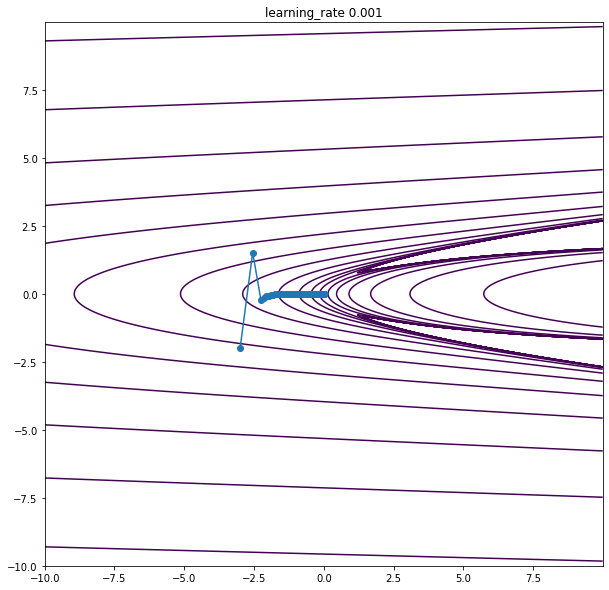

In [ ]:
traj = grad_descent(starting_point=[-3, -2] ,iterations=1000, learning_rate=0.0004)

plt.figure(figsize=(10,10))
plt.title('learning_rate 0.001')
plt.contour(X, Y, F, np.logspace(-5,20,base=10))
x = traj[:,0] 
y = traj[:,1]
plt.plot(x, y, '-o')
plt.show()

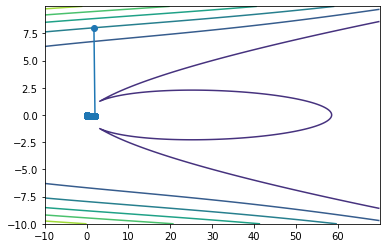

In [ ]:
np.random.seed(20)
traj = grad_descent(iterations=100000, learning_rate=0.00002)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

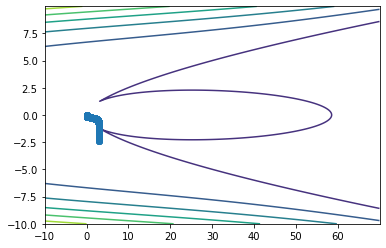

In [ ]:
np.random.seed(30)
traj = grad_descent(iterations=1000000, learning_rate=0.000001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

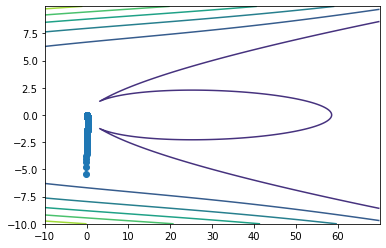

In [ ]:
np.random.seed(50)
traj = grad_descent(iterations=100000, learning_rate=0.000005)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

4. Write a Gradient Descent With Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm's hyperparameters.

In [ ]:
# def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.5, epsilon=10):
#     if starting_point is not None:
#         point = starting_point
#     else:
#         point = np.random.uniform(-1, 1, size=2)
    
#     trajectory = [point]
#     v = np.zeros(point.size)
    
#     for i in range(iterations):
#         grad = grad_f(point)
#         v = alpha * v + epsilon * grad
#         point = point - v
#         trajectory.append(point)
    
#     return np.array(trajectory)

In [ ]:
def grad_descent_with_momentum(starting_point, iterations, alpha, epsilon):
  point=starting_point
  trajectory=[point]
  v=np.array([0,0])

  for i in range(iterations):
    grad=gradient(point)
    v= alpha * v - epsilon * grad
    point = point + v
    trajectory.append(point)
  return np.array(trajectory)

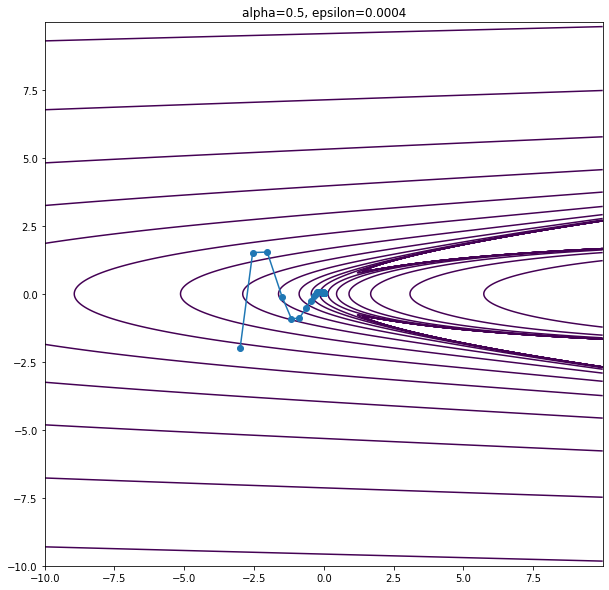

In [ ]:
traj = grad_descent_with_momentum(starting_point=[-3,-2], iterations=1000, alpha=0.5, epsilon=0.0004)

plt.figure(figsize=(10,10))
plt.title('alpha=0.5, epsilon=0.0004')
plt.contour(X, Y, F, np.logspace(-5,20,base=10))
x = traj[:,0] 
y = traj[:,1]
plt.plot(x, y, '-o')
plt.show()

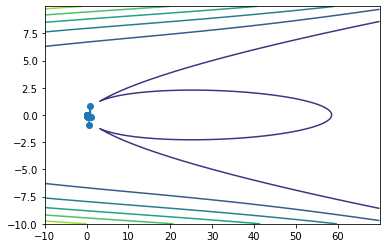

In [ ]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=100000, epsilon=0.0025, alpha=0.001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

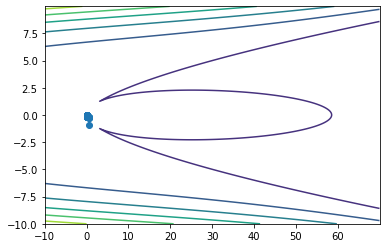

In [ ]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=100000, epsilon=0.001, alpha=0.0001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

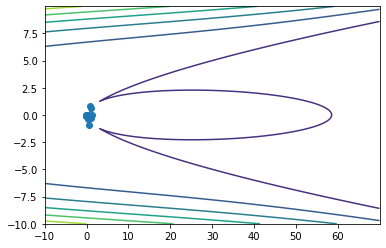

In [ ]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=100000, epsilon=0.0025, alpha=0.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

# 3. Backprop

1. For the same network as in Question 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters

set $z=v_1h_1+v_2h_2+v_3h_3+v_4h_4+c$
$$dL/dc=\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i}\frac{e^{-z}}{(1+e^{-z})^2}$$

$$dL/dv_{1}=\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i}\frac{e^{-z}}{(1+e^{-z})^2}h_1$$
$$dL/dv_{2}=\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i}\frac{e^{-z}}{(1+e^{-z})^2}h_2$$
$$dL/dv_{3}=\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i}\frac{e^{-z}}{(1+e^{-z})^2}h_3$$
$$dL/dv_{4}=\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i}\frac{e^{-z}}{(1+e^{-z})^2}h_4$$

$$dL/db_{1}=\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i}\frac{e^{-z}}{(1+e^{-z})^2}v_1$$
$$dL/db_{2}=\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i}\frac{e^{-z}}{(1+e^{-z})^2}v_2$$
$$dL/db_{3}=\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i}\frac{e^{-z}}{(1+e^{-z})^2}v_3$$
$$dL/db_{4}=\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i}\frac{e^{-z}}{(1+e^{-z})^2}v_4$$

$$dL/dw_{11}=\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i}\frac{e^{-z}}{(1+e^{-z})^2}v_1x_1$$
$$dL/dw_{12}=\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i}\frac{e^{-z}}{(1+e^{-z})^2}v_2x_1$$
$$dL/dw_{13}=\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i}\frac{e^{-z}}{(1+e^{-z})^2}v_3x_1$$
$$dL/dw_{14}=\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i}\frac{e^{-z}}{(1+e^{-z})^2}v_4x_1$$
$$dL/dw_{21}=\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i}\frac{e^{-z}}{(1+e^{-z})^2}v_1x_2$$
$$dL/dw_{22}=\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i}\frac{e^{-z}}{(1+e^{-z})^2}v_2x_2$$
$$dL/dw_{23}=\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i}\frac{e^{-z}}{(1+e^{-z})^2}v_3x_2$$
$$dL/dw_{24}=\frac{y}{\hat{y}_i} +\frac{1-y}{1-\hat{y}_i}\frac{e^{-z}}{(1+e^{-z})^2}v_4x_2$$

2. Write a function grad f(...) that takes in a weights vector and returns the gradient of the Loss at that location.

In [ ]:
# def grad__f(x, y, y_hat, w, b, v, c):
#     loss_y_hat = (y/y_hat - (1-y)/(1-y_hat))
#     h = ff_nn_ReLu(np.array(x)@np.array(w)+b)
    
#     dw = x.T.dot(np.expand_dims((loss_y_hat * y_hat*(1-y_hat)),1).dot(np.expand_dims(v,1).T))
#     db = (loss_y_hat* y_hat*(1-y_hat)).T.dot(np.where(h<=0,0,1))*v
    
#     dv = (loss_y_hat* y_hat*(1-y_hat)).T.dot(h)
#     dc = loss_y_hat.dot(y_hat*(1-y_hat))
    
#     return np.array([dw,db,dv,dc])/len(y)

def grad_f(X,Y,W,b,V,c):
  Y_hat=ff_nn_ReLu(X,W,b,V,c)
  loss=(Y/Y_hat-(1-Y)/(1-Y_hat))
  h=ReLu(np.dot(X,W)+b)

  dc=loss*(Y_hat*(1-Y_hat))
  dv=dc.T.dot(h)
  db=dc.T.dot(np.where(h<=0,0,1))*V
  dw=X.T.dot(np.expand_dims(dc,1)).dot(np.expand_dims(V,1).T)
  dc=np.average(loss*(Y_hat*(1-Y_hat)))
  return np.array([dw,db,dv,dc])

3. Generate a synthetic dataset like the XOR pattern (see below).

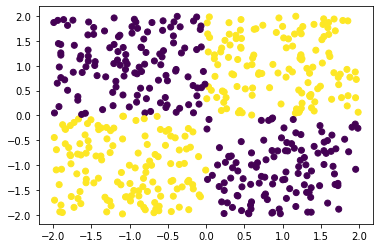

In [ ]:
x = np.random.uniform(-2,2,1000).reshape((500,2))
y = np.zeros(500)
y[x[:,0] * x[:,1]>0]=1

plt.scatter(x[:,0],x[:,1],c=y)

4. Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.

In [ ]:
def loss(Y, Y_hat):
    return  np.sum(-(Y*np.log(Y_hat) + (1-Y)*np.log(1-Y_hat)))

def grad_descent(X, Y, W, b, V, c, iterations=20, learning_rate=0.0015):
  Y_hat=ff_nn_ReLu(X,W,b,V,c)
  losses=[loss(Y,Y_hat)]

  for i in range(iterations):
    dw, db, dv, dc = grad_f(X, Y, W, b, V, c)
    W = W+learning_rate*dw
    b = b+learning_rate*db
    V = V+learning_rate*dv
    c = c+learning_rate*dc
    Y_hat=ff_nn_ReLu(X,W,b,V,c)
    losses.append(loss(Y,Y_hat))
  params=np.array([W,b,V,c])
  return params, losses

params, losses = grad_descent(x, y, W, b, V, c)
losses

[390.73450157069914,
 321.3159807612185,
 295.33777701183215,
 288.4563143898219,
 286.0500001075935,
 284.5602595742603,
 283.3257759691079,
 282.21891124329414,
 281.2128980216541,
 280.30471779595814,
 279.4791124207284,
 278.71917871239896,
 278.0157292114548,
 277.35965115229794,
 276.74158896417237,
 276.16636818348235,
 275.6382384808803,
 275.14333438949143,
 274.6818464398534,
 274.2264641053329,
 273.7916808518638]

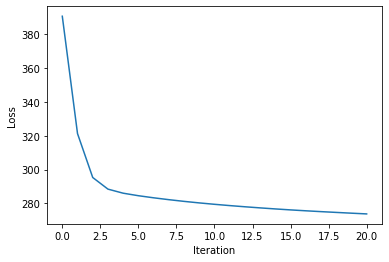

In [ ]:
plt.plot(losses)
plt.ylabel("Loss")
plt.xlabel("Iteration")
plt.show()

5. Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more eciently.

In [ ]:
def grad_descent_with_momentum(X, Y, W, B, V, C, iterations=20, alpha=0.4, epsilon=0.0015):
  Y_hat = ff_nn_ReLu(X,W,B,V,C)
  losses = [loss(Y, Y_hat)]
  w = np.zeros(np.array(W).shape)
  b = np.zeros(np.array(B).size)
  v = np.zeros(np.array(V).size)
  c = 0

  for i in range(iterations):
    dw,db,dv,dc = grad_f(X, Y, W, B, V, C)
    print(dc)
    w = alpha*w - epsilon*dw
    b = alpha*b - epsilon*db
    v = alpha*v - epsilon*dv
    c = alpha*c - epsilon*dc
    W = W-w
    B = B-b
    V = V-v
    C = C-c
    Y_hat = ff_nn_ReLu(X,W,B,V,C)

    losses.append(loss(Y, Y_hat))
  params=np.array([W,B,V,C])
  return params, losses

params_momentum, losses =  grad_descent_with_momentum(x, y, W, b, V, c)
losses 

-0.17716271428760427
-0.10534712049449882
0.0016004407798808557
0.038529081114791495
0.009157671685456698
-0.011273963295299663
-0.007105683094415584
0.0020691333185808886
0.00287817226384524
-0.0005231830321951776
-0.00036248050327827744
0.002539047371851485
0.0042783140485418225
0.004666145644809621
0.004994788094716635
0.005822852212524923
0.006472140770110292
0.006769285863486168
0.00757633541752997
0.0075550508759396244


[390.73450157069914,
 321.3159807612185,
 292.0476353746121,
 294.03338079606834,
 288.2452863432143,
 282.9471597087987,
 279.77986655914236,
 278.63116011433465,
 277.81676320114497,
 276.93813261433377,
 276.0274982065117,
 274.98967038244234,
 273.9657804279002,
 273.14213743060907,
 272.57663199308786,
 272.1584967885111,
 271.7295734630447,
 271.28031252190226,
 270.8686356812366,
 270.48795294172226,
 270.21117714875663]

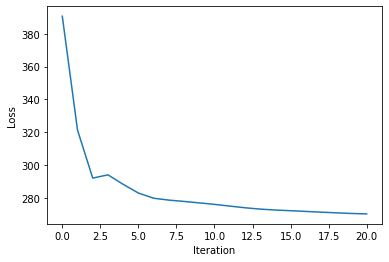

In [ ]:
plt.plot(losses)
plt.ylabel("Loss")
plt.xlabel("Iteration")
plt.show()

gradient with momemtum converges much faster

6. Plot a visualization of the nal decision boundary that your model has learned. Overlay the datapoints in this plot.

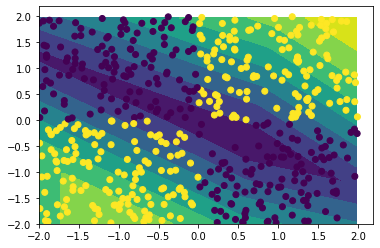

In [ ]:
x1 = np.arange(-2.0, 2.0, 0.025)
x2 = np.arange(-2.0, 2.0, 0.025)

X1, X2 = np.meshgrid(x1, x2)
W, B, V, C= params_momentum

Y_hat= ff_nn_ReLu(np.array((X1.ravel(),X2.ravel())).T,W,B,V,C).reshape((160,160))
plt.contourf(X1, X2, Y_hat)
plt.scatter(x[:, 0], x[:, 1], c=y)